# Credit Card Fraud Detection

In [1]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

# Loading Data

In [2]:
# reading data from csv file
df = pd.read_csv('creditcard.csv')

In [3]:
# prinitng 1st 5 rows with headings  
data_top = df.head()
data_top.to_csv("data_head.csv")
df.head(10)
#There are no null values in the dataset.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Salient Features of data:

Total 31 attributes (including class)

Time is a Discrete-valued numeric attribute.

V1 to V28 are Principal Components of the orginial dataset not avaliable to us.

They are a result of Principal Component Analysis.

They are continuous valued numeric attributes. We cannot say whether they are ratio-scaled or interval-scaled
Amount is a continuous-valued numeric attribute.

Class is a discrete-valued Binary attribute that takes value 0 for non-fraudulent transaction and 1 for fraud transaction.
V1 to V28 are distributed aroud 0 and are scaled.

From V1 to V28, the variance of attributes decreases from left to right, as expected from a PCA output. 

In [5]:
#prinitng 5 number summary, basic info about the data
data_summary = df.describe()
data_summary.to_csv("data_summary.csv")
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Checking on Amount and Time Data

In [6]:
df[['Time', 'Amount']].describe()
# Time and Amount are not scaled.

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


# Visualizing Data Distribution

Non Fraudulent:  99.827 % of the dataset
Fraudulent:  0.173 % of the dataset


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


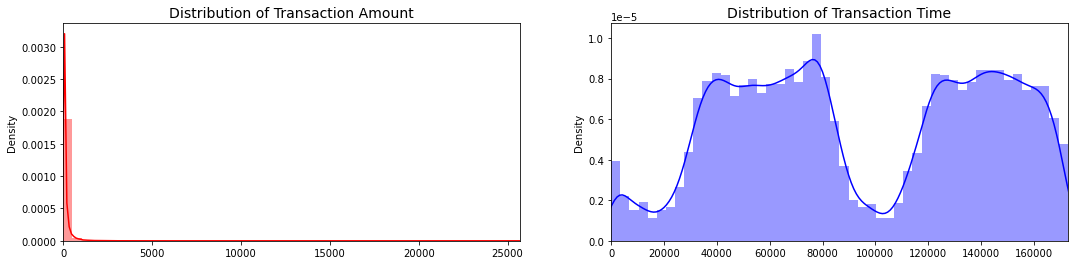

In [8]:
# Time and Amount Distribution

print('Non Fraudulent: ', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Fraudulent: ', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

# colors = ["#0101DF", "#DF0101"]
# sns.countplot('Class', data=df, palette=colors)
# plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
# for i =1:30:

plt.show()

# distribution of amount with Class:

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

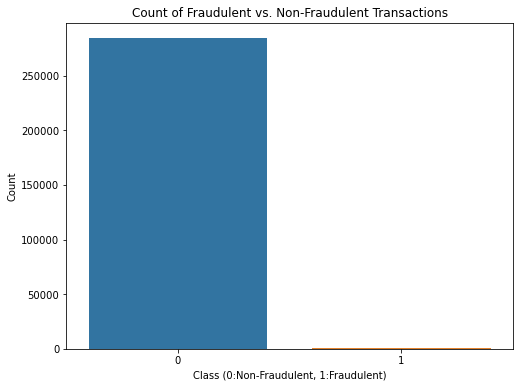

In [9]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0, 0.5, 'Amount')

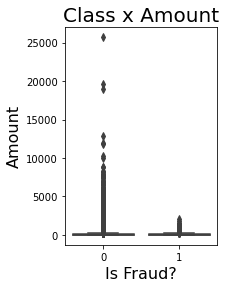

In [10]:
# Class - Amount Plot
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)
# Total Data Objects with Class 0: 2,84,315 (99.83%) - non-fraud transactions
# Total Data Objects with Class 1: 492 (0.17%) - fraud transactions
#Therefore, the dataset has a strong imbalanced nature, where the problem is two-class classification.

There are only 7 points out of 2.8 Lakh having Amount > 10,000.
Therefore these values should be excluded from dataset.

In [11]:

df[df.Amount > 10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [12]:
df = df[df.Amount < 10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0, 0.5, 'Amount')

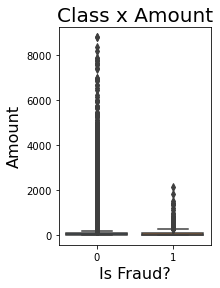

In [13]:
#New distribution of amount with Class:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

Creating new columns for ease in visualization

In [14]:
data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')
#new variable for further analysis
data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
#new variable for further analysis
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

Looking at the Amount and time distribuition of FRAUD transactions

Text(0.5, 1.0, 'Amounts by Minutes of Frauds and Normal Transactions')

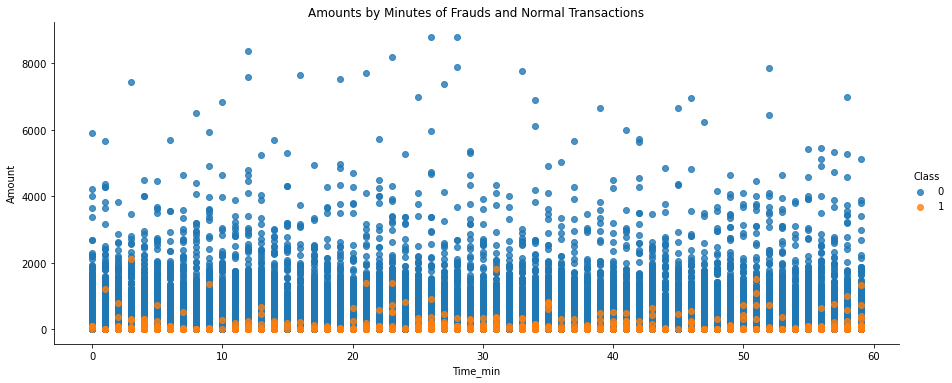

In [15]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)
#plt.savefig('Amount_VS_Time_Scatter.png')

Exploring the distribuition by Class types throught hours

Tried to get an idea of trend by hours in order to identify if at certains hours transcations peak, hinting at a higher probability of fraudulent transaction

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1.0, 25.0)

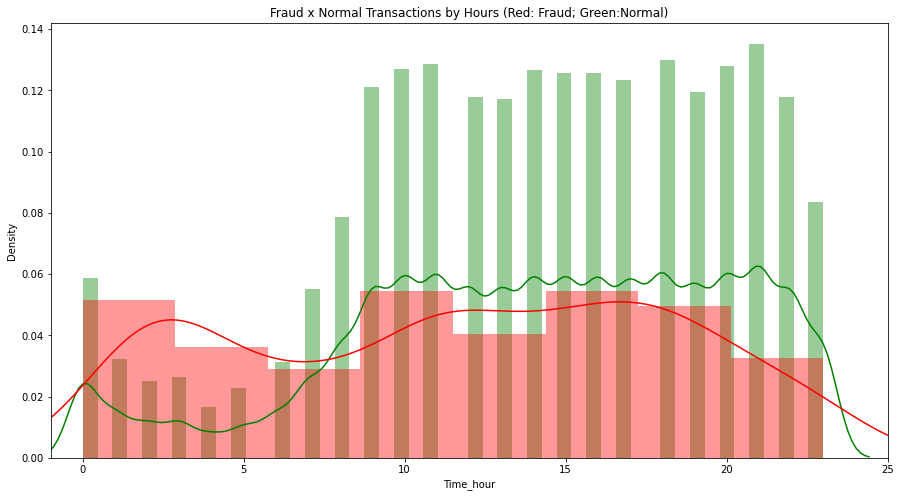

In [16]:
plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,25])
#plt.savefig('Time_distribution_fraud_NonFraud.png')

distribution of each class for syntethic variables between V1-V28

If peaks of both classes occur at different peaks, we can decide on a threshold for that attribute - less data points so bias should be high.

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

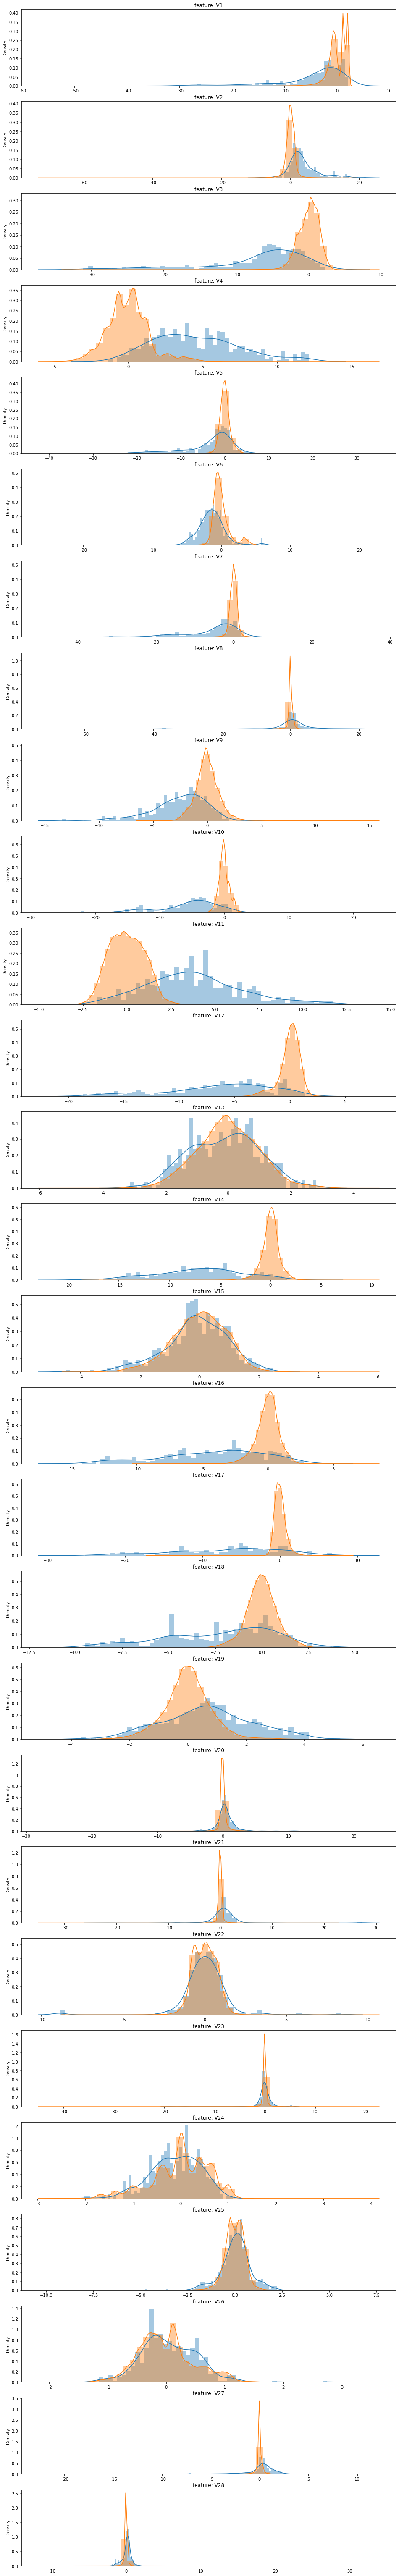

In [18]:
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_new[data_new.iloc[:, 1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_new[cn][data_new.Class == 1], bins=50)
    sns.distplot(data_new[cn][data_new.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
#plt.savefig('Attribute_Distribution_with Class_Seperation.png')

C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

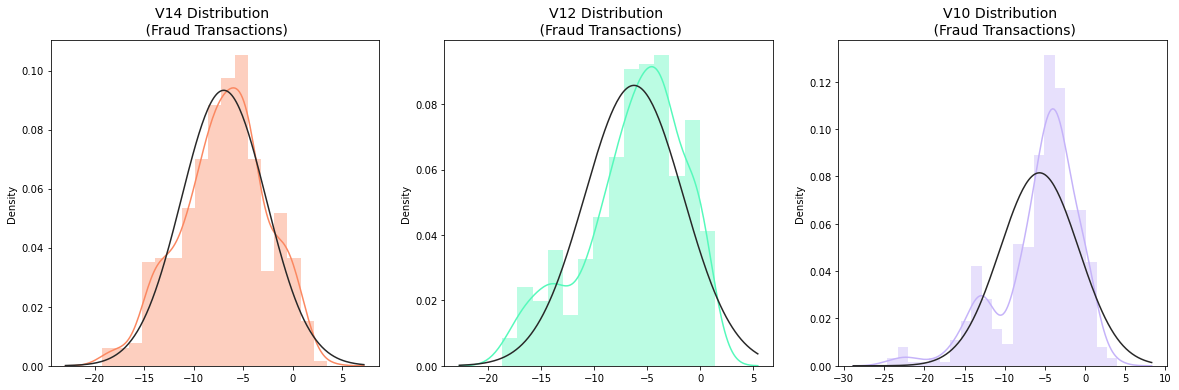

In [19]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

As there is no nominal attribute, we don't use bar graphs for analysis.

NO data cubing performed, as attributes have no hierarchy, and are continuous

Scatter plot of all attributes Pairwise (Pair Plots)

# Box plots

<ipython-input-22-6f815aca4609>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-22-6f815aca4609>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,n

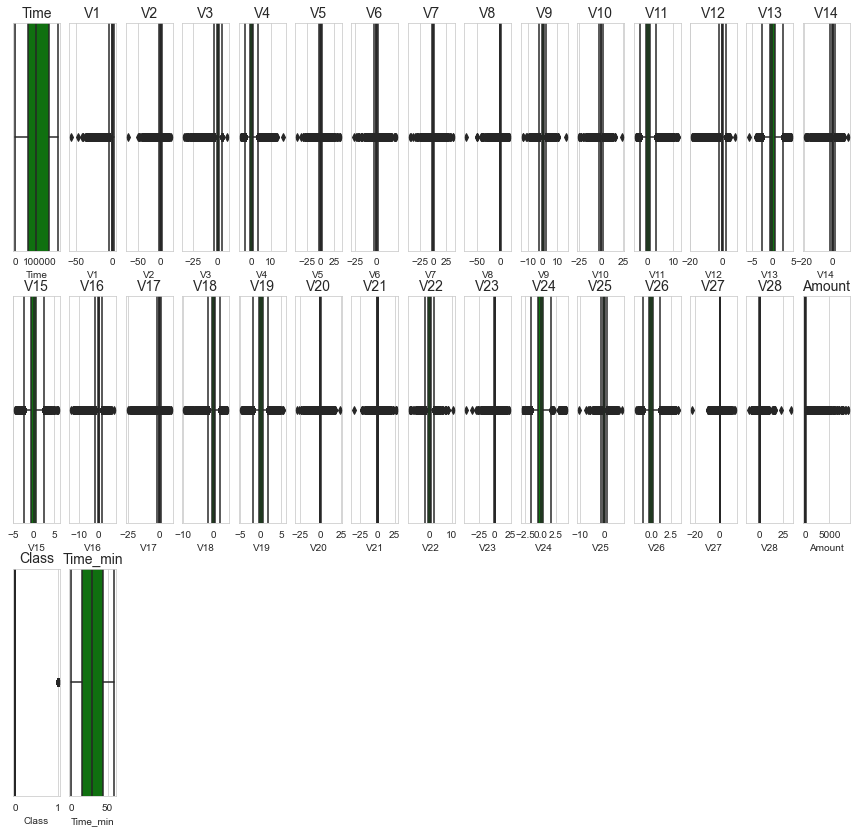

In [22]:
l = df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v',width=50).set_title(l[i],fontsize=14)
#     plt.tight_layout()

Deciding on threshold + detecting corrrelation which made us plot correlation heat map

Correlation matrix heat-map

Most of the pixels are dark pink in colour, which means most of attributes are independent of each other.

Some cases are of positive correlation and some are negatively correlated.

But Pearson’s product coefficient of all lies between (-0.5 to +0.5). Hence, we are not removing any attribute in this step.

Negative correlation with class: V10, V12, V14, V17

We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

<AxesSubplot:>

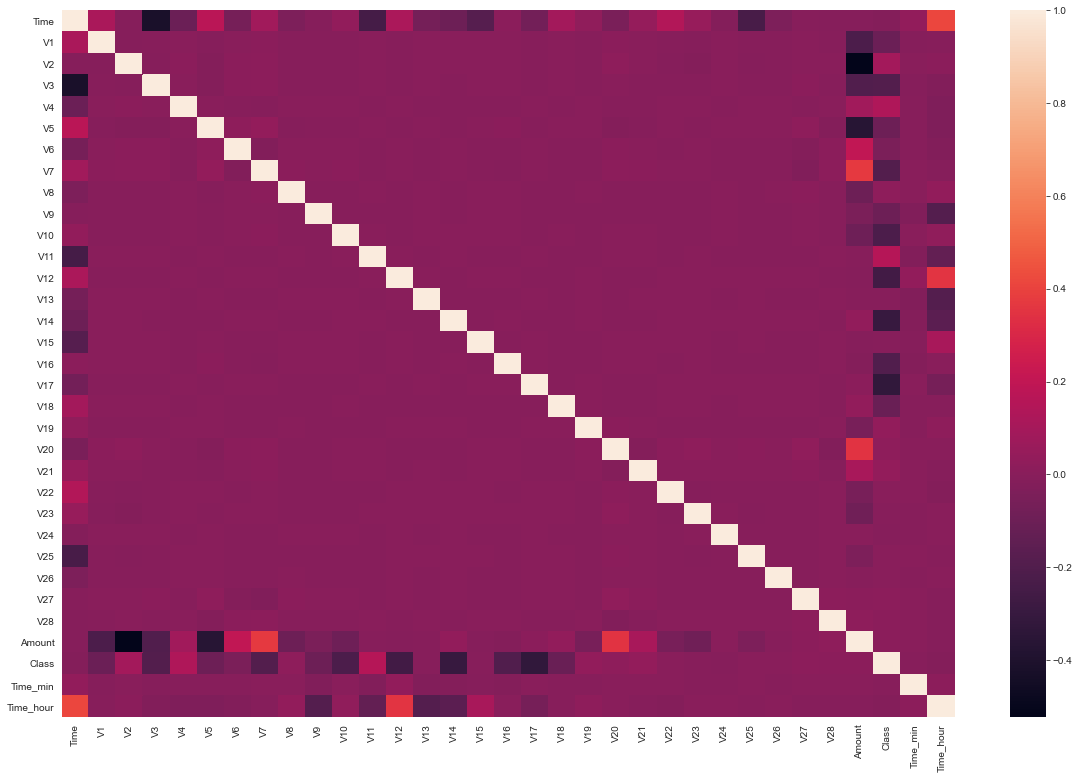

In [23]:
plt.subplots(figsize=(20,13 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap.png')

In [24]:
print('Are there any Missing values? : ',df.isnull().any().any())


Are there any Missing values? :  False


Data Consistency

Data outliers are indicative fraud transactions - so explicit data smoothing not performed.

Extreme outliers will be removed while training the model. We also plan to remove outliers during training the model via a new technique.

Resolving Inconsistencies:

As V1 to V28 are Principal Components, they don't have any inconsistencies.

# Scaling Data using Robust Scalar

In [25]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
df.to_csv("scaled_data.csv")
print('Scaled Data\n')
df.head(10)

Scaled Data



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.994966,-0.256149,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.994942,-0.237703,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.994907,0.262717,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.994907,0.994969,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.994884,-0.256009,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


# Splitting Data

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


# print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
# print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
original_Xtrain.to_csv("X_train.csv")
original_ytrain.to_csv("y_train.csv")
original_Xtest.to_csv("X_test.csv")
original_ytest.to_csv("y_test.csv")

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827072 0.00172928]
[0.99827946 0.00172054]


Reducing Rows via Random-Under Sampling: Numerosity Reduction:

Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

Lets shuffle the data before creating the subsamples

Cosine Similarity Analysis not performed as data has very few zeros.

Parametric Methods for numerosity reduction- NOT Applicable as we need to detect outliers

In [27]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.to_csv('new_data.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
112557,-0.140899,-0.135690,-2.756159,2.251443,-1.806850,-2.608560,1.278343,2.871788,-0.868899,2.088668,...,0.269843,-0.051445,-0.521075,0.102091,1.024952,0.121433,0.765948,-0.108991,0.231898,0
30473,-0.572726,-0.105366,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,1
176682,0.448533,7.375070,-1.610633,-2.355682,-0.174866,-1.212013,-0.999281,0.886298,1.281062,-0.102199,...,0.290765,-0.070836,-0.280005,1.083268,0.152868,-0.911100,-0.631986,0.246760,0.283203,0
122479,-0.095351,2.764114,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
154454,0.198620,1.758944,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,...,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1


# Further Analysis and Preprocessing of new Balanced Data Fram

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


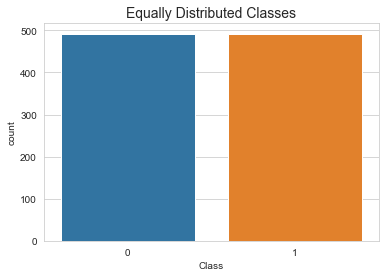

In [28]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Now with this Balanced Dataset, we can apply more Supervised Learning Algorithms which was a short-coming on previous dataset (due to high class imbalance).

New Boxplot

<ipython-input-29-a2e9326dcb83>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-29-a2e9326dcb83>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,n

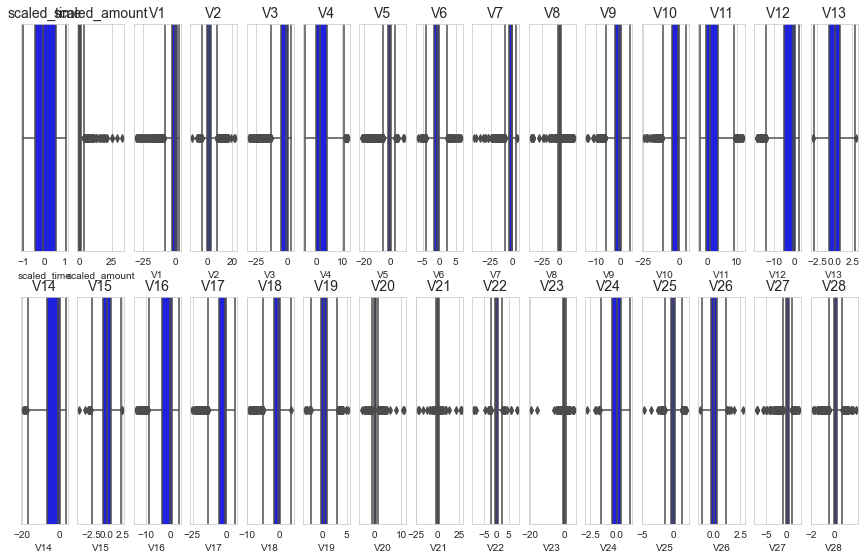

In [29]:
l = new_df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    #sns.set_style('whitegrid')
    sns.boxplot(new_df[l[i]],color='blue',orient='v',width=20).set_title(l[i],fontsize=14)
#     plt.tight_layout()

#plt.savefig('boxplots_new.png')

# Correlation matrix heat-map on new Balanced Data

<AxesSubplot:>

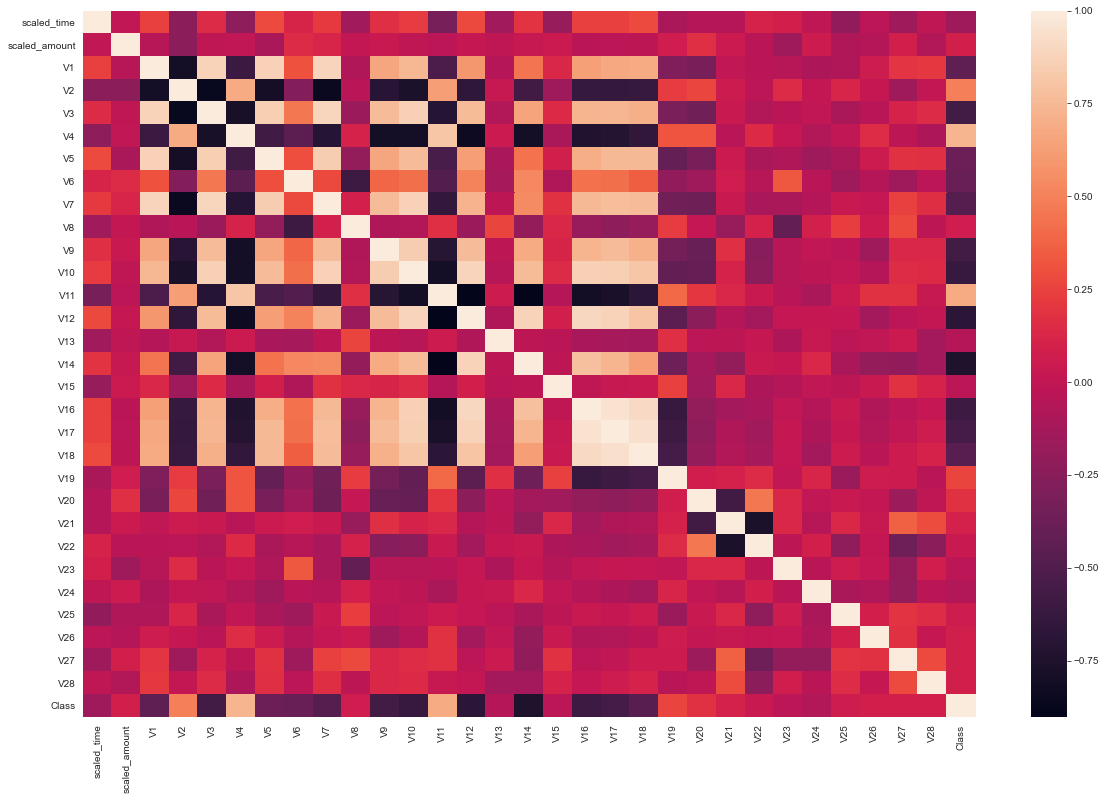

In [30]:
plt.subplots(figsize=(20,13 ))
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap_new.png')

In [31]:
l = new_df.columns.values
for i in range(31):
    for j in range(i):
        if(abs(correlation_matrix.iloc[i,j])>0.9 and i != j):
            print(l[i],l[j])

V12 V11
V16 V12
V17 V16
V18 V16
V18 V17


Note: We are not dropping any of the correlated columns because after performing classification, we found that the accuracy of our model decreases incase of dropping the columns.

In [32]:
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
112557,-0.140899,-0.135690,-2.756159,2.251443,-1.806850,-2.608560,1.278343,2.871788,-0.868899,2.088668,...,0.269843,-0.051445,-0.521075,0.102091,1.024952,0.121433,0.765948,-0.108991,0.231898,0
30473,-0.572726,-0.105366,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,1
176682,0.448533,7.375070,-1.610633,-2.355682,-0.174866,-1.212013,-0.999281,0.886298,1.281062,-0.102199,...,0.290765,-0.070836,-0.280005,1.083268,0.152868,-0.911100,-0.631986,0.246760,0.283203,0
122479,-0.095351,2.764114,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
154454,0.198620,1.758944,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,...,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1


In [33]:

new_df.describe()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.042134,1.137164,-2.397253,1.819041,-3.508705,2.202150,-1.563894,-0.716665,-2.783385,0.236609,...,0.177404,0.421123,-0.030493,-0.013145,-0.067521,0.002576,0.013342,0.088502,0.041476,0.500000
std,0.569821,3.276241,5.502909,3.694685,6.217820,3.228404,4.199069,1.725175,5.847028,4.979804,...,1.072389,2.916328,1.214177,1.178145,0.566414,0.677746,0.473385,0.998869,0.415363,0.500254
min,-0.993403,-0.307434,-30.552380,-12.350779,-31.103685,-4.274932,-22.105532,-6.406267,-43.557242,-41.044261,...,-4.865278,-22.797604,-8.887017,-19.254328,-2.761047,-4.781606,-1.307661,-7.263482,-1.869290,0.000000
25%,-0.434426,-0.285215,-2.837530,-0.171347,-5.113334,-0.172625,-1.747292,-1.553614,-3.105154,-0.191317,...,-0.200381,-0.170285,-0.552164,-0.226046,-0.408878,-0.311940,-0.297307,-0.063111,-0.056748,0.000000
50%,-0.039786,-0.042482,-0.784644,0.953497,-1.400875,1.238923,-0.395878,-0.673942,-0.688369,0.139944,...,0.016834,0.148223,-0.007809,-0.021845,-0.000904,0.039455,-0.030735,0.046875,0.035824,0.500000
75%,0.588954,1.089855,1.024000,2.833075,0.388059,4.202830,0.506490,0.033294,0.289022,0.877002,...,0.404304,0.680554,0.574357,0.207249,0.356510,0.380408,0.298374,0.443492,0.221615,1.000000
max,1.028120,33.286752,2.316367,22.057729,3.222130,12.114672,11.095089,6.474115,5.802537,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.227151,2.208209,2.745261,3.052358,1.779364,1.000000


# Outlier Removal

In [34]:

# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.4937733551053, -18.8220867423816, -18.049997689859396, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.683714633344298, -18.553697009645802, -18.4311310279993, -18.047596570821604]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-14.9246547735487, -

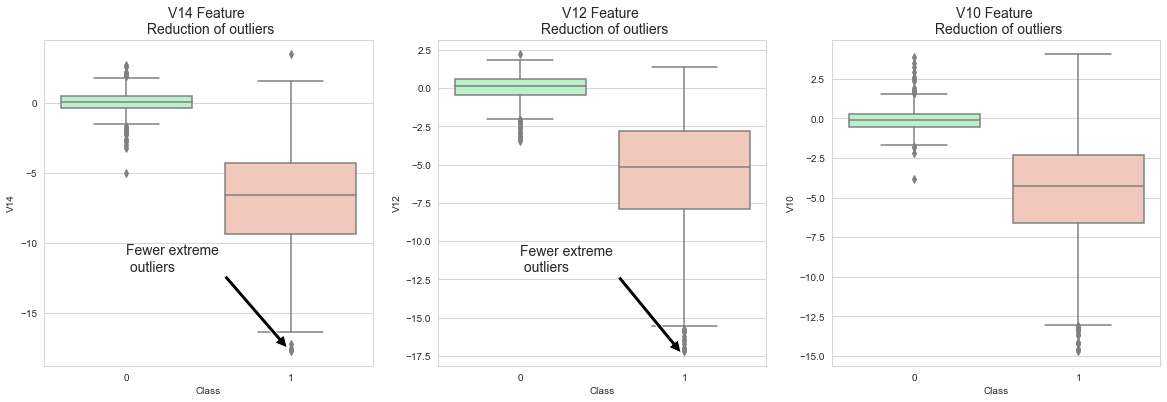

In [35]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [36]:
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
112557,-0.140899,-0.135690,-2.756159,2.251443,-1.806850,-2.608560,1.278343,2.871788,-0.868899,2.088668,...,0.269843,-0.051445,-0.521075,0.102091,1.024952,0.121433,0.765948,-0.108991,0.231898,0
30473,-0.572726,-0.105366,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,1
176682,0.448533,7.375070,-1.610633,-2.355682,-0.174866,-1.212013,-0.999281,0.886298,1.281062,-0.102199,...,0.290765,-0.070836,-0.280005,1.083268,0.152868,-0.911100,-0.631986,0.246760,0.283203,0
122479,-0.095351,2.764114,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
154454,0.198620,1.758944,0.913116,1.145381,-4.602878,2.091803,-0.473224,-2.085436,-1.671244,0.094397,...,0.508985,0.401416,-0.084933,-0.197684,-0.283271,0.387597,-0.553527,0.516274,0.270828,1


In [37]:

new_df.to_csv('outlier_removed_df.csv')

We have trained and tested 5 models:

Isolation Forest

Gaussian Anomaly Detection

Logistic Regression

Support Vector Classifier

K-Nearest Neighors Classifier

All our models were finally tested on a set of around 57,000 transactions, which had proportional 98 fraud transactions, which is roughly equivalent to 10 hours worth credit card transactions.

When we trained and tested our models, there were various interesting observations.

There was always a trade-off between the number of fraud transactions that were missed and the number of non-fraud transactions that were branded as fraudulent.

Practically, for the European Bank this tradeoff can be modeled as a tradeoff between missed fraud transactions and work-force required.

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

print("df shape", df.shape)
print("original_Xtrain shape", original_Xtrain.shape)
print("original_ytrain shape", original_ytrain.shape)
print("original_Xtest shape", original_Xtest.shape)
print("original_ytest shape", original_ytest.shape)

df shape (284799, 31)
original_Xtrain shape (227840, 30)
original_ytrain shape (227840,)
original_Xtest shape (56959, 30)
original_ytest shape (56959,)


In [41]:
# Make Dataset

credit_card_4_5 = pd.concat([pd.DataFrame(original_Xtrain), pd.DataFrame(original_ytrain)], axis=1)
credit_card_1_5 = pd.concat([pd.DataFrame(original_Xtest), pd.DataFrame(original_ytest)], axis=1)

In [43]:
credit_card_1_5.to_csv("credit_card_1_5.csv")
credit_card_4_5.to_csv("credit_card_4_5.csv")

In [44]:
print("credit_card_4_5 -> ", credit_card_4_5.shape)
print("credit_card_1_5 -> ", credit_card_1_5.shape)

credit_card_4_5 ->  (227840, 31)
credit_card_1_5 ->  (56959, 31)


In [45]:

df = credit_card_4_5

In [46]:
nonfraud = df[df.Class == 0]
fraud = df[df.Class == 1]


In [47]:
print(fraud.shape)
print(nonfraud.shape)

(394, 31)
(227446, 31)


# ISOLATION FOREST

An Anomaly Detection Algorithm

Motivaton: Outliers are less frequent than regular observations and they lie further away from the regular observations.

Strategy:

The algorithm tries to isolates every data tuple from its neighbours.

The data tuples which require relatively less number of steps for isolation are regarded as outliers.

This is done by dividing the data into smaller samples and then building small decision trees for finding the path length for isolation.

In [48]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
X_test = credit_card_1_5.drop('Class',axis=1)
y_test = credit_card_1_5['Class']

[[44236 12625]
 [   11    87]]
0.7781562176302252
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     56861
           1       0.01      0.89      0.01        98

    accuracy                           0.78     56959
   macro avg       0.50      0.83      0.44     56959
weighted avg       1.00      0.78      0.87     56959

Total number of Transactions classified as Fraudulent:  12712
Number of Fraudulent Transactions classified as Non-fraudulent:  11 out of 98


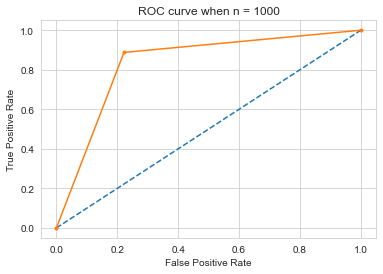

In [50]:
nonfraud_sample = nonfraud.sample(n=1000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

[[56612   249]
 [   51    47]]
0.9947330535999579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.16      0.48      0.24        98

    accuracy                           0.99     56959
   macro avg       0.58      0.74      0.62     56959
weighted avg       1.00      0.99      1.00     56959

Total number of Transactions classified as Fraudulent:  296
Number of Fraudulent Transactions classified as Non-fraudulent:  51 out of 98


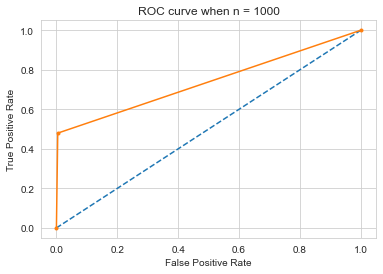

In [51]:
nonfraud_sample = nonfraud.sample(n=45000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

[[55161  1700]
 [   26    72]]
Accuracy for Isolation Forest:  96.96975017117576
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.04      0.73      0.08        98

    accuracy                           0.97     56959
   macro avg       0.52      0.85      0.53     56959
weighted avg       1.00      0.97      0.98     56959

Total number of Transactions classified as Fraudulent:  1772
Number of Fraudulent Transactions classified as Non-fraudulent:  26 out of 98


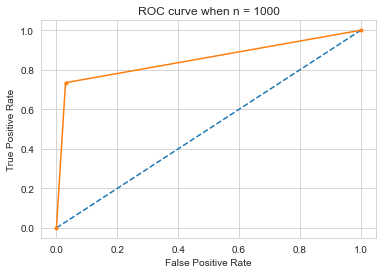

In [52]:
nonfraud_sample = nonfraud.sample(n=5000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print("Accuracy for Isolation Forest: ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")


from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

<AxesSubplot:title={'center':'Gaussian Anomaly Detection'}>

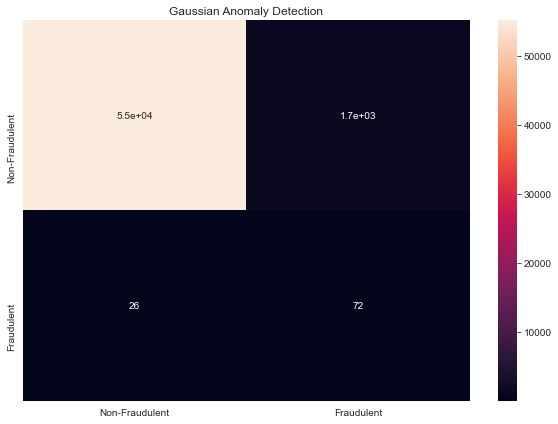

In [53]:
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Gaussian Anomaly Detection")
sn.heatmap(df_cm, annot=True)

In [108]:
y_pred_iso = y_pred


# GAUSSIAN ANOMALY DETECTION
The intuition behind applying this technique in our case;-

It is preferred over Supervised Learning Algorithms when there are very small positive examples (y=1) compared to large negative examples (y=0) which makes it ideal for our case due to high-class imbalance nature of our Dataset.

Since credit card fraud in the future may be completely different, it gives us the liberty of classifying different types of anomalies. In contrast to other classification algorithms which demand future examples similar to training ones.

The features provided to us are already gone through PCA meaning independent of each other thus satisfying the prerequisite of this technique.

In [54]:
from scipy.stats import multivariate_normal

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean = mu, cov = sigma)
    return p.pdf(dataset)

In [76]:
# Epsilon value is the threshold value,
# below which we will mark transaction as Anomalous.

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(4))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(4))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(4))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

In [56]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
98162,-0.213188,-0.251537,1.201447,-0.081376,0.558712,0.380271,-0.755632,-0.724093,-0.209844,0.037897,...,-0.187168,-0.198318,-0.555798,0.092858,0.530717,0.223161,0.420217,-0.055412,-0.000598,0
245801,0.801516,-0.115008,2.020409,0.395875,-2.544368,1.263173,1.204200,-0.442393,0.523358,-0.133236,...,-0.233102,-0.033430,0.016800,-0.069961,0.047921,0.505046,-0.510291,-0.015460,-0.037820,0
123461,-0.091109,0.353130,1.002574,-0.013739,0.358093,1.259391,0.060706,0.631422,-0.059981,0.260232,...,-0.130610,0.002211,0.154993,-0.078205,-0.263406,0.545057,-0.304893,0.045594,0.009312,0
184706,0.489465,-0.296814,2.074045,0.609211,-3.071551,0.808518,0.985467,-1.806380,0.732120,-0.411139,...,-0.226956,-0.054961,-0.008910,0.024384,0.882203,0.294787,0.665834,-0.086338,-0.012468,0
121226,-0.100731,1.716042,0.881740,-0.836723,1.097991,0.390666,-1.319676,-0.064183,-0.548547,0.140910,...,0.150078,-0.103345,-0.317790,0.030943,0.478373,-0.034103,0.938042,-0.043178,0.037689,0


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Feature Importance
# To ease the Problem at hand, we use Feature importance to get rid 
# of unwanted features whose existance will not improve our prediction model. 

# For that, I have used random forest classifier to identify the influential fetures. 

rnd_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rnd_clf.fit(df.iloc[:,2:29],df.iloc[:,30]);

In [60]:
# Visualizing feature importance
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.iloc[:,2:29].columns), 
                                     reverse = False)))
trace2 = go.Bar(
    x = x ,
    y = y,
    marker = dict(color=x, colorscale = 'Viridis', reversescale = True),
    name = 'Random Forest Feature importance',
    orientation = 'h',
)

layout = dict(
    title='Barplot of Feature importances',
    width = 600, height = 1000,
    yaxis=dict( showgrid=False, showline=False, showticklabels=True),
    margin=dict(l=300),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

ModuleNotFoundError: No module named 'plotly'

In [63]:
print("Relatively More Important Features")
for name, importance in zip(df.iloc[:,2:29].columns, rnd_clf.feature_importances_):
    if importance > 0.015 :
        print('"' + name + '"'+',')

Relatively More Important Features
"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",
"V18",


In [64]:
# Dropping less important features
drop_features = ['V1','V2','V5','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
df.drop(drop_features, axis =1, inplace = True)

In [65]:
df.shape

(227840, 14)

In [72]:
train_strip_v1 = df[df["Class"] == 1]
train_strip_v0 = df[df["Class"] == 0]

In [73]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

C:\Users\Legion\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
# Finding Probabilities

mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.765743
Best Recall Score 0.771574
Best Precision Score 0.760000
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.721839
Best Recall Score 0.796954
Best Precision Score 0.659664
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score , Recall and Precision are as below
Best F1 Score 0.449315
Best Recall Score 0.832487
Best Precision Score 0.307692
----------------------------------------


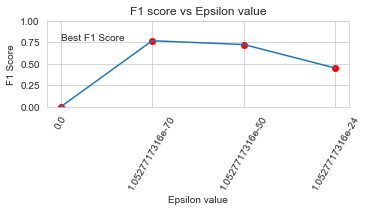

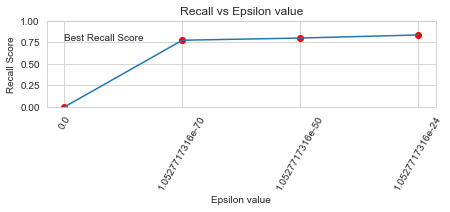

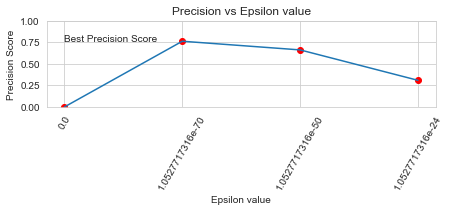

In [77]:
# Performance wrt to Epsilon values
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

fscore, ep= selectThresholdByCV(p_cv,train_cv_y)

In [78]:
print("PREDICTIONS ON CROSS-VALIDATION SET\n")
predictions = (p_cv < ep)
Recall = recall_score(train_cv_y, predictions, average = "binary")    
Precision = precision_score(train_cv_y, predictions, average = "binary")
F1score = f1_score(train_cv_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Cross Validation dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON CROSS-VALIDATION SET

F1 score , Recall and Precision for Cross Validation dataset
Best F1 Score 0.765743
Best Recall Score 0.771574
Best Precision Score 0.760000


In [79]:
print("PREDICTIONS ON TEST SET\n")
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON TEST SET

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.755784
Best Recall Score 0.750000
Best Precision Score 0.761658


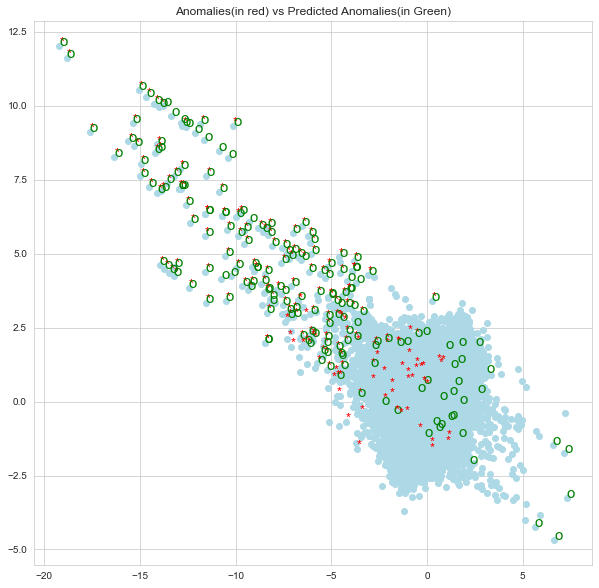

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')


In [81]:
test_df = credit_card_1_5

In [83]:

credit_card_1_5.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
108708,-0.160461,5.651202,-3.170818,0.185735,-3.399852,3.761155,-2.148047,-1.598944,-2.519565,1.316215,...,1.932254,1.092051,-0.041080,0.904395,0.180016,0.049970,-0.257100,0.859282,0.225924,1
10204,-0.809164,-0.148267,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,...,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,1
99506,-0.206080,6.535914,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,...,1.503688,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,1
263274,0.894986,-0.296674,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,...,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,1
147548,0.046771,-0.290945,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,...,-0.178626,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1


In [84]:
# Dropping less important features
drop_features = ['V1','V2','V5','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
test_df.drop(drop_features, axis =1, inplace = True)

In [85]:
test_y = test_df['Class']
test_df.drop(labels = ["Class"], axis = 1, inplace = True)
p_test_df = multivariateGaussian(test_df,mu,sigma)

In [86]:
print("PREDICTIONS ON ORIGINAL TEST SET\n")
predictions = (p_test_df < ep)
Recall = recall_score(test_y, predictions, average = "binary")    
Precision = precision_score(test_y, predictions, average = "binary")
F1score = f1_score(test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON ORIGINAL TEST SET

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.728070
Best Recall Score 0.846939
Best Precision Score 0.638462


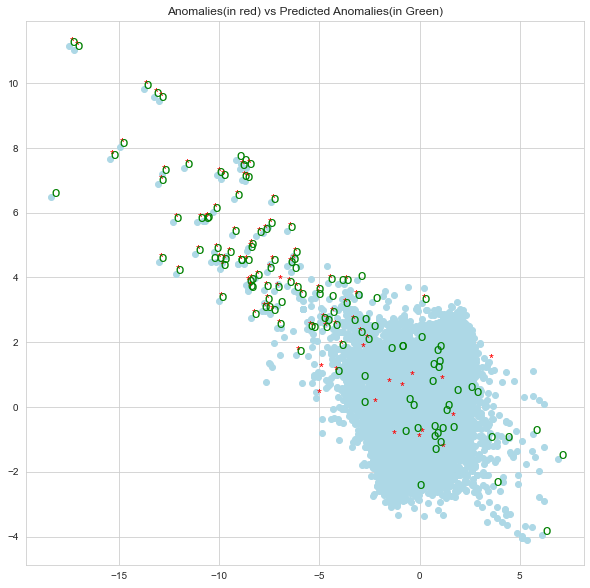

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(test_df['V14'],test_df['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(test_df['V14'].index):
       if test_y.loc[txt] == 1 :
            ax.annotate('*', (test_df['V14'].loc[txt],test_df['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (test_df['V14'].loc[txt],test_df['V11'].loc[txt]),fontsize=15,color='Green')

[[56814    47]
 [   15    83]]
Accuracy for Gaussian Anomaly Detection:  99.89114977439912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.64      0.85      0.73        98

    accuracy                           1.00     56959
   macro avg       0.82      0.92      0.86     56959
weighted avg       1.00      1.00      1.00     56959

Total number of Transactions classified as Fraudulent:  130
Number of Fraudulent Transactions classified as Non-fraudulent:  15 out of 98


<AxesSubplot:title={'center':'Gaussian Anomaly Detection'}>

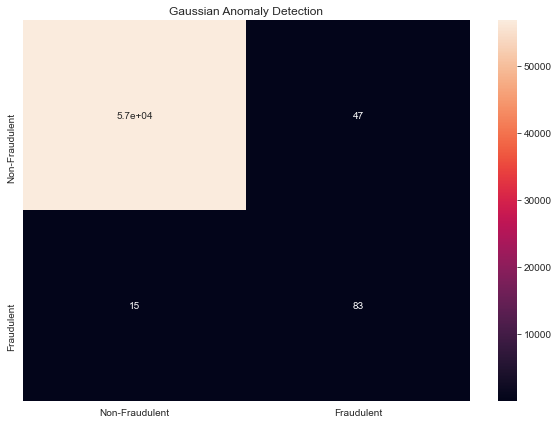

In [88]:
import seaborn as sn
mat = confusion_matrix(test_y,predictions)
print(mat)
print("Accuracy for Gaussian Anomaly Detection: ", accuracy_score(test_y,predictions)*100)
print(classification_report(test_y,predictions))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")
df_cm = pd.DataFrame(confusion_matrix(test_y,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Gaussian Anomaly Detection")
sn.heatmap(df_cm, annot=True)

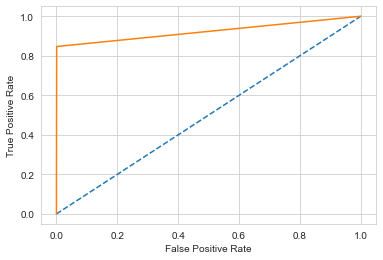

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, predictions)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
name = 'ROC curve for Anomaly Detection'


# CLASSIFICATION MODELS


In [90]:
df = pd.read_csv('credit_card_4_5.csv')
df = df.sample(frac=1)
df = df.drop(df.columns[0], axis=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1][:393]
non_fraud_df = df.loc[df['Class'] == 0][:393]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
# new_df.to_csv('new_data_4_5_shuffled.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
80447,-0.219074,3.265511,-3.172419,-2.219461,0.458407,-2.897865,0.181901,0.490572,0.183129,0.401560,...,-0.158013,0.004722,0.622014,-0.213894,-1.635456,0.981479,-0.596669,-0.010371,-0.105890,0
115375,-0.864816,-0.293460,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,...,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1
74964,-0.775587,2.330632,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,1
29097,0.070315,-0.209754,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,...,-2.140874,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,1
119182,-0.038993,-0.201649,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,...,0.370041,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,1


In [91]:

# Undersampling before cross validating (prone to overfit)
y_train = new_df['Class']
X_train = new_df.drop('Class', axis=1)

dftest = pd.read_csv('credit_card_1_5.csv')
dftest = dftest.drop(df.columns[0], axis=1)

y_test = dftest['Class']
X_test = dftest.drop('Class',axis=1)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Classification Report of  LogisiticRegression :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56959
   macro avg       0.50      0.50      0.50     56959
weighted avg       1.00      1.00      1.00     56959

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classification Report of  KNearest :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.70      0.07      0.13        98

    accuracy                           1.00     56959
   macro avg       0.85      0.54      0.56     56959
weighted avg       1.00      1.00      1.00     56959

Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classification Report of  Support Vector Classifier :
               precision    recall  f1-score 

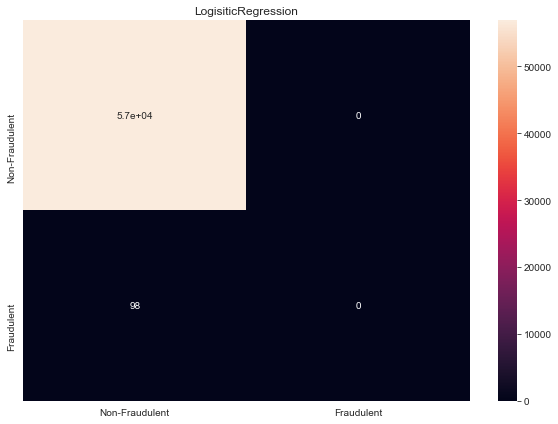

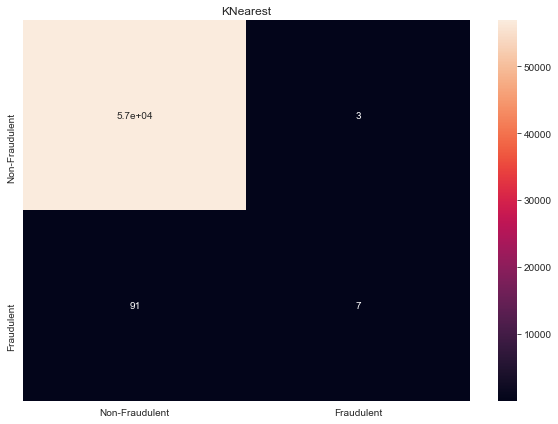

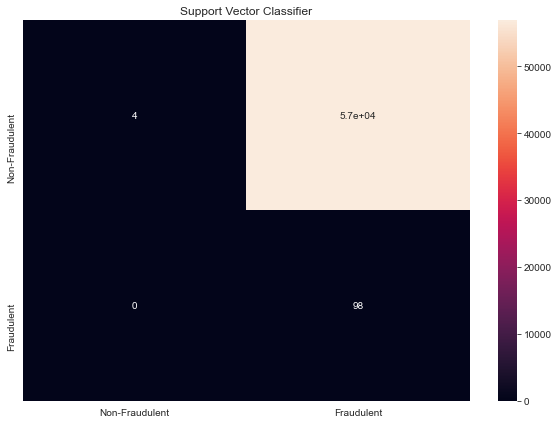

In [93]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
#Let's see how our model performed
from sklearn.metrics import classification_report
classrep = []
confusionmatrices = {}
predicts = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print('Classification Report of ',key,':\n',classification_report(y_test, predictions))
    predicts[key] = predictions
    classrep.append(classification_report(y_test, predictions));
    confusionmatrices[key] = confusion_matrix(y_test,predictions);
    df_cm = pd.DataFrame(confusion_matrix(y_test,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
    plt.figure(figsize = (10,7))
    plt.title(key)
    sn.heatmap(df_cm, annot=True)
    name = key + 'Confusion Matrix'
    plt.savefig(name)
#     print('The cofusion matrix for',key,':\n',confusion_matrix(y_test,predictions),'\n')
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [103]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Legion\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

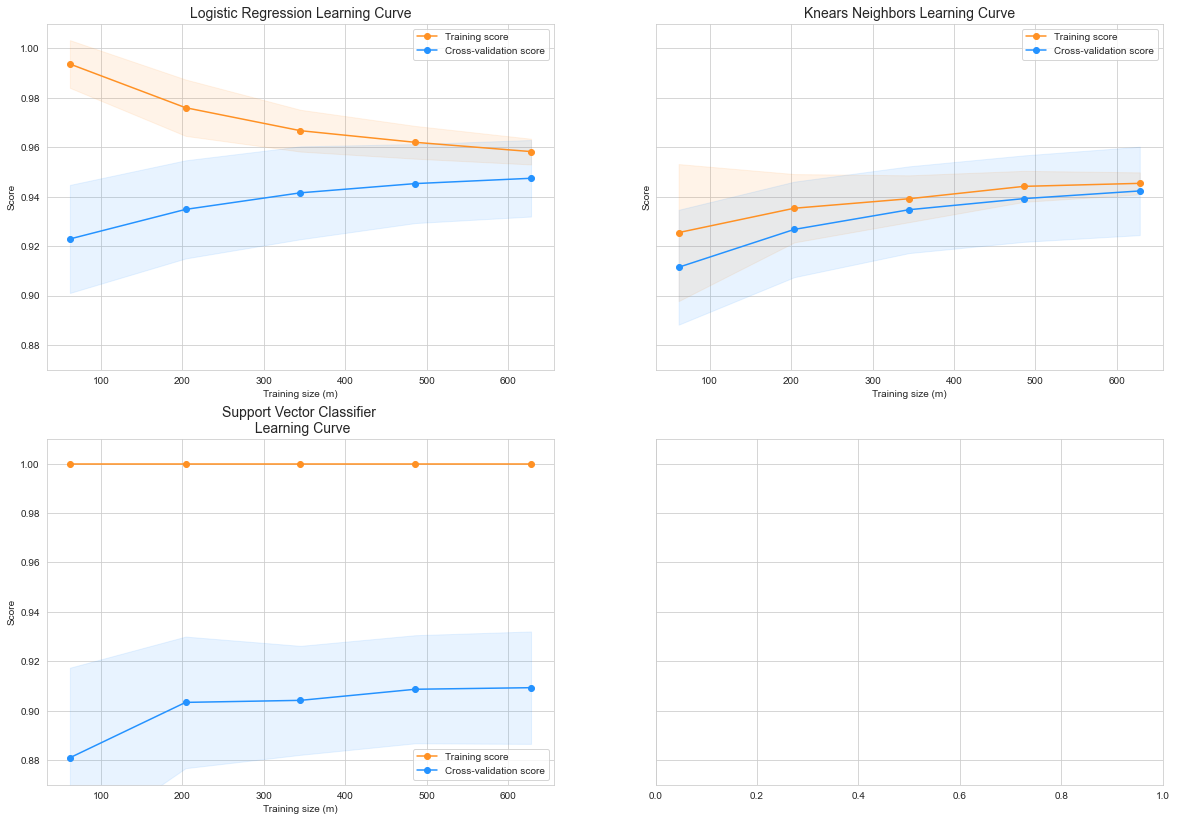

In [104]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(LogisticRegression(),SVC(), DecisionTreeClassifier(),  KNeighborsClassifier(),X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

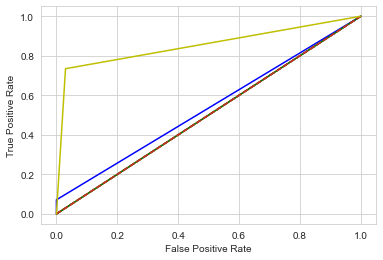

In [109]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"LogisiticRegression": 'r-',
    "KNearest": 'b-',
    "Support Vector Classifier": 'g-',
       "isolation forest" : 'y-'}
predicts["isolation forest"] = y_pred_iso
classifiers["isolation forest"] = clf
for key, classifier in classifiers.items():
    fpr, tpr, thresholds = roc_curve(y_test, predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label=key)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key

# Conclusion:
Among all algorithms, Logistic Regression has the highest percentage of correctly identified transactions, while Gaussian Anomaly Detection had the highest accuracy.

Logistic Regression classified 85 out of 98 fraudulent transactions correctly, with 92% accuracy overall.

Only 5% of the fraud transactions were missed by Logistic Regression.

Number of non-fraudulent transactions classified as non-fraudulent: approx 1000.

Total Number of Transactions needed to be verified: approx 1100 in 10 hours

Assuming that one employee would need 10 minutes for manually verifying whether a transaction is actually fraud or not, he/she can verify 60 transactions in 10 hours.

Practically, the bank needs to have a team of 40 dedicated individuals, who would work in 2 shifts, if Logistic Regression is used.

If Gaussian Anomaly Detection is used, only 120 transactions need to be manually verified in 10 hours, with 99.84% accuracy which would need a team of 4 dedicated individuals only.

But 33% of the fraud transactions were missed by this method